In [1]:
import pandas as pd
import sqlalchemy as sa
from urllib.parse import quote
import datetime
import seaborn as sns
from datetime import datetime, timedelta
import datetime

In [2]:
cur_time = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print("current times:", cur_time)

current times: 2024-07-08 21:15:20


In [3]:
df = pd.read_csv("D:/workshop/GEEKs/dataset/dataset.csv", encoding="cp874", )

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5221 entries, 0 to 5220
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   E0          5220 non-null   float64
 1   E1          5221 non-null   int64  
 2   PE0         3407 non-null   float64
 3   PE1         3407 non-null   float64
 4   DISEASE     5221 non-null   int64  
 5   HN          3394 non-null   object 
 6   NMEPAT      341 non-null    object 
 7   SEX         5221 non-null   int64  
 8   AGEY        5221 non-null   int64  
 9   AGEM        5221 non-null   int64  
 10  AGED        5221 non-null   int64  
 11  MARIETAL    3407 non-null   float64
 12  RACE        5221 non-null   object 
 13  RACE1       10 non-null     float64
 14  OCCUPAT     5221 non-null   int64  
 15  ADDRCODE    5221 non-null   object 
 16  METROPOL    3407 non-null   float64
 17  HOSPITAL    3407 non-null   float64
 18  TYPE        5221 non-null   int64  
 19  RESULT      5221 non-null  

Func show label

In [5]:
def annotate_vertical_plot(ax):
  for p in ax.patches:
    value = p.get_height()
    position = (p.get_x() + p.get_width() / 2, p.get_height())
    ax.annotate(f"{value: .0f}", position, ha ="center", va="bottom")

ref data dic : https://apps-doe.moph.go.th/boe/software/file/R506_v_4_10.pdf

ประเภทเชื้อ

In [ ]:
ax = sns.countplot(data=df, x="DISEASE", )
annotate_vertical_plot(ax)

เพศ 1 ชาย 2 หญิง

In [ ]:
ax = sns.countplot(data=df , x="SEX")
annotate_vertical_plot(ax)

สถานะ  1 โสด 2 คู่ 3 หย่าร้าง 4 หม้าย 5 ไม่ทราบ

In [ ]:
ax = sns.countplot(data=df , x="MARIETAL")
annotate_vertical_plot(ax)

สัญชาติ 1 ไทย 2 จีน/ฮ่องกง/ไต้หวัน 3 พม่า 4 มาเลเซีย 5 กัมพูชา 6 ลาว 7 เวียดนาม 8 อื่น

In [48]:
# def change_race(txt) :
#    race_dict = {
#         "ไทย": 1,
#         "จีน": 2,
#         "ฮ๋องกง": 2,
#         "ไต้หวัน": 2,
#         "พม่า": 3,
#         "มาเลเซีย": 4,
#         "กัมพูชา": 5,
#         "ลาว": 6,
#         "เวียดนาม": 7,
#         "อื่นๆ": 8
#     }
#    if txt in race_dict:
#       return race_dict[txt]
#    else:
#       return "ไม่พบข้อมูล"

In [49]:
##print(change_race("ไทย"))

1


In [9]:
df.loc[df['RACE'] == 'ไทย', 'RACE'] = '1'
df.loc[df['RACE'] == 'จีน', 'RACE'] = '2'
df.loc[df['RACE'] == 'ฮ๋องกง', 'RACE'] = '2'
df.loc[df['RACE'] == 'ไต้หวัน', 'RACE'] = '2'
df.loc[df['RACE'] == 'พม่า', 'RACE'] = '3'
df.loc[df['RACE'] == 'มาเลเซีย', 'RACE'] = '4'
df.loc[df['RACE'] == 'กัมพูชา', 'RACE'] = '5'
df.loc[df['RACE'] == 'ลาว', 'RACE'] = '6'
df.loc[df['RACE'] == 'เวียดนาม', 'RACE'] = '7'
df.loc[df['RACE'] == 'อื่นๆ', 'RACE'] = '8'


In [ ]:
ax = sns.countplot(data=df , x="RACE")
annotate_vertical_plot(ax)

In [ ]:
ax = sns.countplot(data=df , x="DATESICK")
annotate_vertical_plot(ax)

ผู้ป่วยรายอำเภอ

In [35]:
df['NADDRCODE'] = df.ADDRCODE.apply(lambda x: x[:4])
df['NADDRCODE']

0       9602
1       9601
2       9602
3       9601
4       9601
        ... 
5216    9601
5217    9601
5218    9606
5219    9601
5220    9603
Name: NADDRCODE, Length: 5221, dtype: object

In [44]:
patient_grouped = df.groupby([ 'NADDRCODE']).size().reset_index()
print(patient_grouped)

   NADDRCODE     0
0       9601  1229
1       9602   178
2       9603   376
3       9604   540
4       9605   742
5       9606   392
6       9607   135
7       9608   196
8       9609    70
9       9610   259
10      9611   362
11      9612   217
12      9613   524


In [ ]:
ax = sns.countplot(data=df , x="NADDRCODE")
annotate_vertical_plot(ax)

In [ ]:
new_df = df[~df["NADDRCODE"].str.contains('96')]
new_df

เอาเฉพาะผู้ป่วยที่อยุ่นราธิวาส

In [ ]:
df = df[df["NADDRCODE"].str.contains('96')]
df

In [46]:
# Strip any leading/trailing whitespace from the date strings
df['DATESICK'] = df['DATESICK'].str.strip()

# Convert 'DATESICK' column to datetime
df['DATESICK'] = pd.to_datetime(df['DATESICK'], format='%d/%m/%Y')

print(df)
print(df.dtypes)

           E0    E1    PE0  PE1  DISEASE         HN NMEPAT  SEX  AGEY  AGEM  \
0       942.0     4  191.0  3.0       26  000491517    NaN    1    31     3   
1       952.0    14  197.0  5.0       26   00056933    NaN    1    62     1   
2       964.0    26   29.0  1.0       26       1791    NaN    2    39     6   
3       966.0    28  196.0  4.0       26  000233446    NaN    2    32     4   
4       954.0    16   96.0  2.0       26  000231638    NaN    1    15     0   
...       ...   ...    ...  ...      ...        ...    ...  ...   ...   ...   
5216  22471.0  1218    NaN  NaN       26        NaN    NaN    2     2     9   
5217  22472.0  1219    NaN  NaN       26        NaN    NaN    2    43     2   
5218  22473.0  1220    NaN  NaN       26        NaN    NaN    1    51     0   
5219  22474.0  1221    NaN  NaN       26        NaN    NaN    1    14     5   
5220  22475.0  1222    NaN  NaN       26        NaN    NaN    2    19     5   

      ...  DATEDEATH  DATERECORD  DATEREACH  INTIME

C:\Users\user\AppData\Local\Temp\ipykernel_24876\364506874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATESICK'] = df['DATESICK'].str.strip()
C:\Users\user\AppData\Local\Temp\ipykernel_24876\364506874.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATESICK'] = pd.to_datetime(df['DATESICK'], format='%d/%m/%Y')


In [47]:
# from datetime import datetime
def calculate_week_number(str_date):
    # Start of the custom week 1
    # str_date = datetime.strptime(str_date, format).date()
    start_of_week_1 = pd.Timestamp(year=str_date.year, month=1, day=7)
    # print(start_of_week_1)
    # if str_date < start_of_week_1:
    #     start_date = datetime.date(str_date.year, 1, 7)
    if str_date < start_of_week_1:
        return 52  # For dates before the start of week 1
    return ((str_date - start_of_week_1).days // 7) + 1

In [ ]:
# Sample data with date as string
data = {
    'date': ['02/01/2024', '07/01/2024', '06/07/2024'],
    'cases': [5, 10, 3]
}
da = pd.DataFrame(data)

da['ndate'] = da['date'].str.strip()

# Convert 'DATESICK' column to datetime
da['ndate'] = pd.to_datetime(da['ndate'], format='%d/%m/%Y')
da.info()
da['week_number'] = da['ndate'].apply(calculate_week_number)
print(da)

In [162]:
# Apply the function to get the week number
#df['week_number'] = df['DATESICK'].apply(calculate_week_number)

# Group by week number and sum cases
weekly_cases = da.groupby('week_number')['ndate'].count().reset_index()

print(weekly_cases)

   week_number  ndate
0            1      1
1           26      1
2           52      1


หาผู้ป่วย รายอำเภอ

In [51]:
# Apply the function to get the week number
df['week_number'] = df['DATESICK'].apply(calculate_week_number)

# Group by week number and sum cases
#weekly_cases = df.groupby('week_number','NADDRCODE')['DATESICK'].count().reset_index()
case_on_week_by_district = df.groupby(['week_number', 'NADDRCODE']).size().reset_index(name='DATESICK')
print(case_on_week_by_district)

     week_number NADDRCODE  DATESICK
0              1      9601        18
1              1      9602         4
2              1      9603         6
3              1      9604         8
4              1      9605        12
..           ...       ...       ...
623           52      9608         2
624           52      9610         4
625           52      9611        12
626           52      9612         3
627           52      9613         6

[628 rows x 3 columns]


C:\Users\user\AppData\Local\Temp\ipykernel_24876\1357932700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week_number'] = df['DATESICK'].apply(calculate_week_number)


In [70]:
def find_week_number(date):
    """
    Calculate the week number of a given date, where week 1 starts on January 7.

    Args:
    date (datetime.date): The date to calculate the week number for.

    Returns:
    int: The week number of the date.
    """
    # Define the starting date of week 1
    start_date = datetime.date(date.year, 1, 7)
    
    # If the given date is before January 7 of the same year, adjust the start date to the previous year's January 7
    if date < start_date:
        start_date = datetime.date(date.year - 1, 1, 7)
    
    # Calculate the difference in days
    days_diff = (date - start_date).days
    
    # Calculate the week number
    week_number = (days_diff // 7) + 1
    
    return week_number

def get_start_of_week(week_number, year):
    """
    Calculate the start date of a given week number, where week 1 starts on January 7.

    Args:
    week_number (int): The week number.
    year (int): The year.

    Returns:
    datetime.date: The start date of the week.
    """
    start_date = datetime.date(year, 1, 7)
    start_of_week = start_date + datetime.timedelta(weeks=week_number - 1)
    return start_of_week

def create_weeks_dataframe(start_date_str, end_date_str):
    """
    Create a DataFrame with weeks starting from January 7, along with their start and end dates.

    Args:
    start_date_str (str): The start date string for the DataFrame in 'YYYY-MM-DD' format.
    end_date_str (str): The end date string for the DataFrame in 'YYYY-MM-DD' format.

    Returns:
    pd.DataFrame: A DataFrame with week numbers and their start and end dates.
    """
    start_date = datetime.datetime.strptime(start_date_str, '%Y-%m-%d').date()
    end_date = datetime.datetime.strptime(end_date_str, '%Y-%m-%d').date()
    
    weeks = []
    current_date = start_date
    
    while current_date <= end_date:
        week_number = find_week_number(current_date)
        start_of_week = get_start_of_week(week_number, current_date.year)
        end_of_week = start_of_week + datetime.timedelta(days=6)
        weeks.append({
            'week_number': week_number,
            'start_date': start_of_week,
            'end_date': end_of_week
        })
        current_date = end_of_week + datetime.timedelta(days=1)
    
    weeks_df = pd.DataFrame(weeks).drop_duplicates(subset=['week_number'])
    return weeks_df

In [71]:
# Example usage:
start_date = '2024-01-07'
end_date = '2025-01-04'
weeks_df = create_weeks_dataframe(start_date, end_date)
weeks_df

,week_number,start_date,end_date
0,1,2024-01-07,2024-01-13
1,2,2024-01-14,2024-01-20
2,3,2024-01-21,2024-01-27
3,4,2024-01-28,2024-02-03
4,5,2024-02-04,2024-02-10
5,6,2024-02-11,2024-02-17
6,7,2024-02-18,2024-02-24
7,8,2024-02-25,2024-03-02
8,9,2024-03-03,2024-03-09
9,10,2024-03-10,2024-03-16


In [72]:
weeks_df

,week_number,start_date,end_date
0,1,2024-01-07,2024-01-13
1,2,2024-01-14,2024-01-20
2,3,2024-01-21,2024-01-27
3,4,2024-01-28,2024-02-03
4,5,2024-02-04,2024-02-10
5,6,2024-02-11,2024-02-17
6,7,2024-02-18,2024-02-24
7,8,2024-02-25,2024-03-02
8,9,2024-03-03,2024-03-09
9,10,2024-03-10,2024-03-16


In [75]:
ndf = case_on_week_by_district.merge(weeks_df, on='week_number', how='left')
ndf

,week_number,NADDRCODE,DATESICK,start_date,end_date
0,1,9601,18,2024-01-07,2024-01-13
1,1,9602,4,2024-01-07,2024-01-13
2,1,9603,6,2024-01-07,2024-01-13
3,1,9604,8,2024-01-07,2024-01-13
4,1,9605,12,2024-01-07,2024-01-13
...,...,...,...,...,...
623,52,9608,2,2024-12-29,2025-01-04
624,52,9610,4,2024-12-29,2025-01-04
625,52,9611,12,2024-12-29,2025-01-04
626,52,9612,3,2024-12-29,2025-01-04


In [77]:
new_df = pd.merge(case_on_week_by_district, weeks_df , on=['week_number'])
new_df = new_df[['week_number','NADDRCODE', 'start_date', 'end_date', 'DATESICK']]
new_df

,week_number,NADDRCODE,start_date,end_date,DATESICK
0,1,9601,2024-01-07,2024-01-13,18
1,1,9602,2024-01-07,2024-01-13,4
2,1,9603,2024-01-07,2024-01-13,6
3,1,9604,2024-01-07,2024-01-13,8
4,1,9605,2024-01-07,2024-01-13,12
...,...,...,...,...,...
623,52,9608,2024-12-29,2025-01-04,2
624,52,9610,2024-12-29,2025-01-04,4
625,52,9611,2024-12-29,2025-01-04,12
626,52,9612,2024-12-29,2025-01-04,3


<Axes: xlabel='week_number', ylabel='DATESICK'>

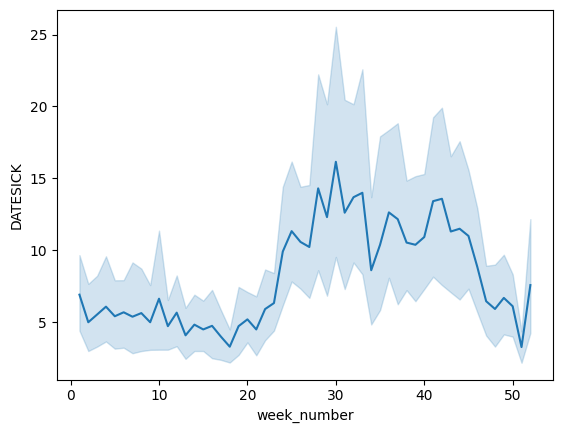

In [78]:
sns.lineplot(data=new_df, x='week_number',y='DATESICK')